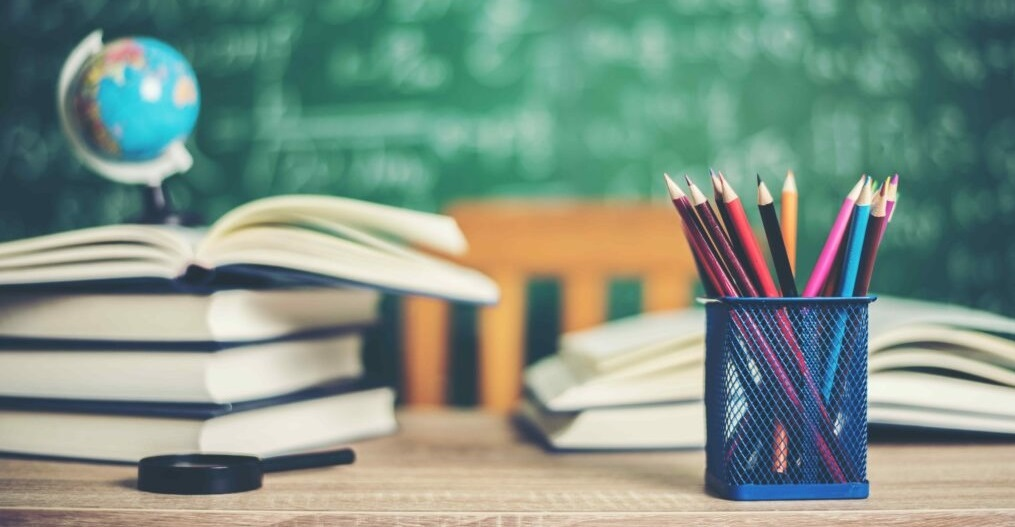

# Title

In [1]:
# Análise de dados de educação do Rio Grande do Sul

# Head

In [2]:
# Educação - Ensino Médio - Taxa de Distorção Idade Série - Total
# by geanclm in 22/02/2022 at 19:13h
# Notebook inspirado e desenvolvido com base na LIVE
# do LabHacker da Câmara dos Deputados

# Local files

In [20]:
# arquivos utilizados
!dir data\*102524.csv, *RS_*.ipynb, img\1.jpg

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 2656-7D0D

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\LabHacker\data

22/02/2022  19:07            35.176 fee-2013-mun-taxa-de-distorcao-idade-serie-total-102524.csv
               1 arquivo(s)         35.176 bytes

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\LabHacker

23/02/2022  11:18           281.552 DADOS_RS_EDUCA€ÇO_csv_mapa.ipynb
               1 arquivo(s)        281.552 bytes

 Pasta de C:\Users\geanc\Downloads\DATA SCIENCE\LabHacker\img

23/02/2022  11:08           116.617 1.jpg
               1 arquivo(s)        116.617 bytes
               0 pasta(s)   631.864.229.888 bytes dispon¡veis


# Import libs

In [21]:
# importar biblioteca pandas para trabalhar com quadro de dados
import pandas as pd

# importar matplotlib para trabalhar com gráficos
import matplotlib.pyplot as plt

# biblioteca necessaria para gerar a visualzação do mapa com as marcações
import folium
# Obs: necessário instalar antes a biblioteca 'folium', caso ainda não esteja instalada
# Anaconda prompt: pip install folium

# Import data

In [22]:
# fonte: https://dados.rs.gov.br/dataset/fee-taxa-de-distorcao-idade-serie-total-102524/resource/b3c6d6d6-e23c-4d7b-a368-2c5817113958
df = pd.read_csv(r'data\fee-2013-mun-taxa-de-distorcao-idade-serie-total-102524.csv',
                 sep =',', encoding='cp1252', skiprows=1)

# Data preparation

In [23]:
# renomear campos para facilitar os comandos e simplificar visualização
df.rename(columns={'Município':'mun',
                   'ibge':'ibge',
                   'latitude':'lat',
                   'longitude':'lon',
                   '/Educação/Ens...de Série/Total 2013 (-)':'tx_distorção'}, inplace=True)

In [24]:
df['tx_distorção'] = df['tx_distorção'].str.replace(',','.').astype(float)

# Data visualization

In [25]:
# Imprimindo na tela o quadro de dados em formato transposto
df.head(7).T

,0,1,2,3,4,5,6
mun,Aceguá,Água Santa,Agudo,Ajuricaba,Alecrim,Alegrete,Alegria
ibge,4300034,4300059,4300109,4300208,4300307,4300406,4300455
lat,-31.8608,-28.1672,-29.6447,-28.2342,-27.6579,-29.7902,-27.8345
lon,-54.1671,-52.031,-53.2515,-53.7757,-54.7649,-55.7949,-54.0557
tx_distorção,25.7,14.7,26.4,24.1,18.9,36,18.2


In [9]:
# Percebe-se que não já valores ausentes na base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mun           495 non-null    object 
 1   ibge          495 non-null    int64  
 2   lat           495 non-null    float64
 3   lon           495 non-null    float64
 4   tx_distorção  495 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.5+ KB


In [10]:
# importante ter o dicionário dos dados disponiveis para melhor compreensão da base
# os metadados devem estar junto com a base de dados
# nesse caso específico faltou o entendimento correto sobre o campo tx_distorção.
# Assume-se então que para um valor alto da 'tx_distorção' tem-se muitos alunos atrasados
# em relação ao ano letivo correspondente a idade do mesmo aluno.
df.nlargest(10, 'tx_distorção')

,mun,ibge,lat,lon,tx_distorção
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


In [15]:
df[df['tx_distorção'] <= 10].count()

mun             17
ibge            17
lat             17
lon             17
tx_distorção    17
dtype: int64

In [16]:
df[df['tx_distorção'] >= 45].count()

mun             17
ibge            17
lat             17
lon             17
tx_distorção    17
dtype: int64

# Data graph

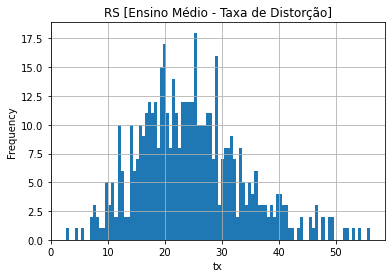

In [34]:
plt.title(f'RS [Ensino Médio - Taxa de Distorção]')
df['tx_distorção'].plot.hist(bins=100)
plt.xlabel('tx')
plt.grid();

In [37]:
RS = folium.Map(location=[-30.2112805,-53.1409445], zoom_start=6)

In [38]:
RS

In [47]:
# registrando valores menores ou igual a tx 10
for i, mun in df[df['tx_distorção']<=10].iterrows():
    folium.Marker(
        location=[mun['lat'],mun['lon']],
        popup=mun['mun'],
        icon=folium.map.Icon(color='green')
    ).add_to(RS)

In [49]:
# registrando valores maiores ou igual a tx 45
for i, mun in df[df['tx_distorção']>=45].iterrows():
    folium.Marker(
        location=[mun['lat'],mun['lon']],
        popup=mun['mun'],
        icon=folium.map.Icon(color='red')
    ).add_to(RS)

In [50]:
RS

# Insights

In [ ]:
# Taxa de distorção abaixo de 10 e acima de 45 com mesma proporção,
# e com maior occorrência geografica ao norte do estado
# do Rio Grande do Sul e próximo a localidade de Passo Fundo